**Description of Method** \
*In this group project we try to predict which kinds of players has the longest playing hours, subscription, experience and Age are predictors, played_hours is the response variable, KNN model is used.*

1. **Load tidyverse and tidymodels package into R**
2. **Read the players data frame**: We only need players data set in the project.
3. **Wrangle the data**: First we should select the column subscription, experience and Age and played_hours. Secondly, drop all the N/A value in the data frame, Thirdly, change the experience into 5 levels and numeric as it is a char type which won't be helpful for the model traning. Thus, treat "Beginner" as level 1, "Amateur" as 2, "Regular" as 3, "Veteran" as 4, "Pro" as 5. The number is in order of experience level. Finally, since when looking at the data, there are some extreme value like 200 hours, but most of other data is only around 2 hours. Thus, we all a column called played_hours_log that is equal to log(played_hours + 1), helps reduce the influence from the extreme data.
4. **Summary of data set**: Build three tibbles that contains summary of the data set, which includes the information about the predictors and the response variables.
5. **Visulization of data set**: Build a visualization that contains variables of experience, subscription, age, and played hours in a scattor plot. y-aixs is the played hours, x-axis is the age, separate the plots by experience and subscription. 
6. **Build K-NN model**: Use tune() to build the model of K-NN this is for cross validation.
7. **Cross Validation**: Apply fold 5 cross validation to find the optimal K value for regression(k = 16). Plot the graph of the relationship between K and rmse value.
8. **Evaluate the Model**: Use the testing portion of the model to evalutate the efficiency of the model.
9. **Find observation**: Use the best K-NN model above to find which kind of player will have the largest played hours. First list all the age(8 to 50), experience and subscription that is valid, then use a tibble to combine them and list all the possible observations. Use the model to predict all the observations in the tibble and find which observation has the largest predicted played_hours. Mutate the experience column back into char(string) formation so it can be easily seen.
10. **Summary**: Use a tibble to present the summary/result of the predicted played hours.
11. **Visulization**: Use visulization to observe the predicted played hours from Age 8 to 50, with different experience and subscriptions.

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


n,mean_played_hours,median_played_hours,max_played_hours,mean_age,min_age,max_age
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
194,5.904639,0.1,223.1,20.52062,8,50


experience_label,mean_played_hours,n
<chr>,<dbl>,<int>
Amateur,6.0174603,63
Beginner,1.2485714,35
Pro,2.7846154,13
Regular,18.7257143,35
Veteran,0.6479167,48


subscribe,mean_played_hours,n
<lgl>,<dbl>,<int>
FALSE,0.5019231,52
TRUE,7.8830986,142


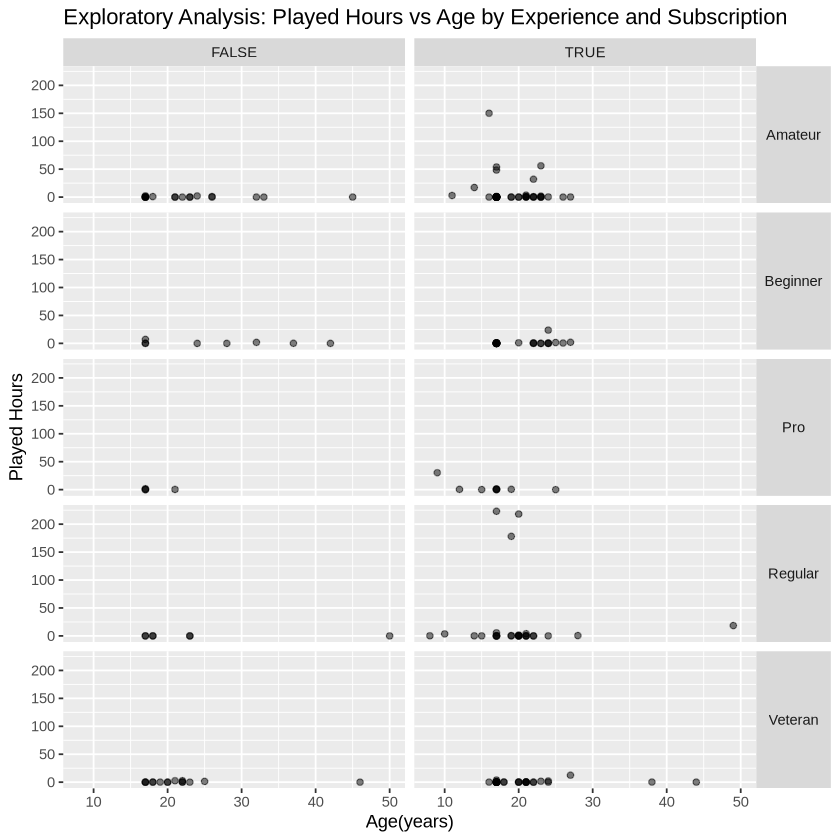

.pred,played_hours,Age,experience,subscribe,played_hours_log
<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
0.2855710,30.3,9,5,TRUE,3.44361810
0.2645638,0.0,21,2,FALSE,0.00000000
0.4244156,0.1,17,2,TRUE,0.09531018
0.3238951,0.0,17,5,TRUE,0.00000000
0.1579937,0.0,17,1,TRUE,0.00000000
0.4244156,0.5,17,2,TRUE,0.40546511
1.5165046,0.6,19,3,TRUE,0.47000363
0.1579937,1.0,17,1,TRUE,0.69314718
0.4244156,0.0,17,2,TRUE,0.00000000


[1] "The observation of the maximum playing time"


Age,experience_label,subscribe,.pred
<dbl>,<chr>,<lgl>,<dbl>
15,Regular,TRUE,2.75331


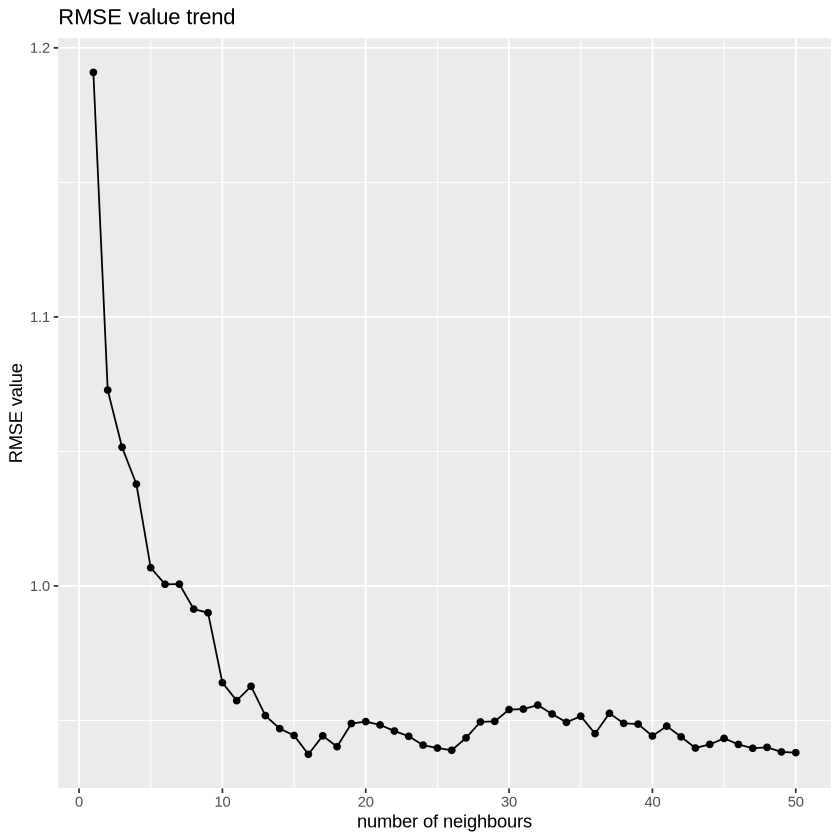

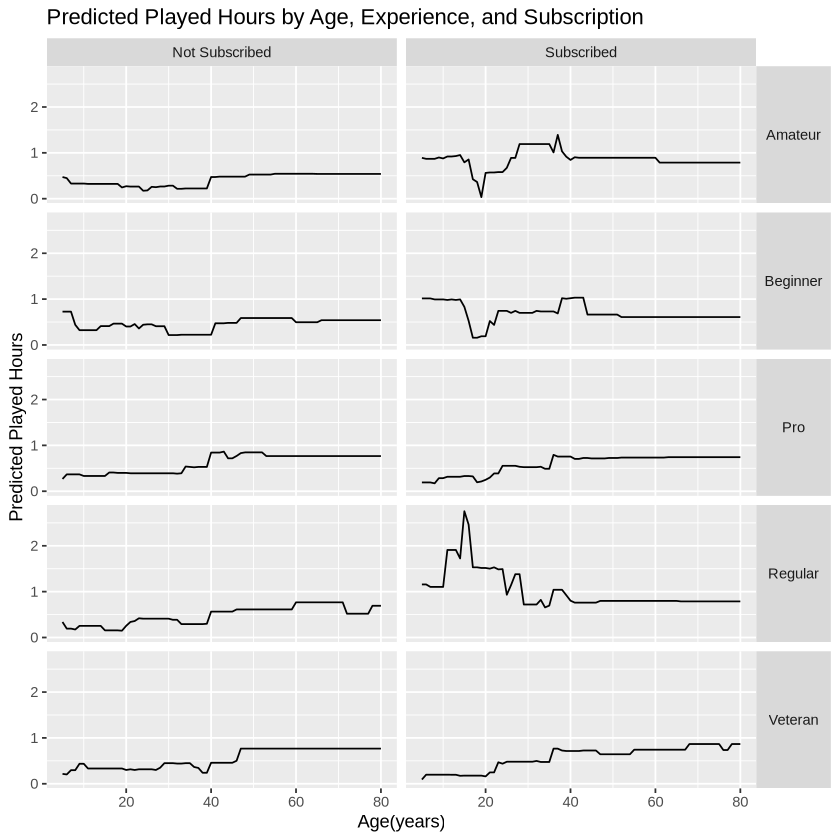

In [93]:
# load the packages
library(tidyverse)
library(tidymodels)
# read the data set
players_data <- read_csv('players.csv')

# wrangle and clean the dataset
players_wrangle <- players_data |>
  select(played_hours, Age, experience, subscribe) |>
  mutate(experience = as.numeric(factor(experience, 
                                        levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"), 
                                        ordered = TRUE)),
         played_hours_log = log(played_hours + 1)) |>  
  filter(!is.na(Age), !is.na(experience), !is.na(played_hours), !is.na(subscribe))

# summary of the data set
players_string <- players_wrangle |> 
  mutate(experience_label = case_when(
    experience == 1 ~ "Beginner",
    experience == 2 ~ "Amateur",
    experience == 3 ~ "Regular",
    experience == 4 ~ "Veteran",
    experience == 5 ~ "Pro"
  ))
summary_stats <- players_wrangle |> 
  summarise(
    n = n(),
    mean_played_hours = mean(played_hours),
    median_played_hours = median(played_hours),
    max_played_hours = max(played_hours),
    mean_age = mean(Age),
    min_age = min(Age),
    max_age = max(Age)
  )
experience_dist <- players_string |> 
  group_by(experience_label) |> 
  summarise(mean_played_hours = mean(played_hours), n = n())

subscribe_dist <- players_wrangle |> 
  group_by(subscribe) |> 
  summarise(mean_played_hours = mean(played_hours), n = n())
summary_stats
experience_dist
subscribe_dist

# Visulization of the data set that relate to the explotary question. 


eda_plot <- ggplot(players_plot, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.5) +
  facet_grid(experience_label ~ subscribe, 
             labeller = labeller(subscribe = c("0" = "Not Subscribed", "1" = "Subscribed"))) +
  labs(title = "Exploratory Analysis: Played Hours vs Age by Experience and Subscription",
       x = "Age(years)", y = "Played Hours") +
  theme(strip.text.y = element_text(angle = 0))
eda_plot

#Split the data in to 80% training and 20% testing. 
set.seed(512)
players_split <- initial_split(players_wrangle, prop = 0.8, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)

# Build the recipe, model, use cross validation to find best K
knn_recipe <- recipe(played_hours_log ~ Age + experience + subscribe, data = players_training) |>
  step_scale(Age, experience) |>  
  step_center(Age, experience)    


knn_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = tune()) |>
  set_engine('kknn') |>
  set_mode('regression')

vfold <- vfold_cv(players_training, v = 5, strata = played_hours)
k_samples <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

knn_fit <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = vfold, grid = k_samples) |>
  collect_metrics() |>
  filter(.metric == 'rmse')

knn_smallest <-  knn_fit |>
  filter(mean == min(mean)) |>
  pull(neighbors)

#Plot the trend of K value when rmse value changes.
rmse_plot <- knn_fit |>
ggplot(aes(x = neighbors, y = mean)) +
geom_point() +
geom_line() +
labs(x = 'number of neighbours', y = 'RMSE value', title = 'RMSE value trend')
rmse_plot

# Build the best K-NN model with optimal K value
final_knn_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = knn_smallest) |>
  set_engine('kknn') |>
  set_mode('regression')

final_fit <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(final_knn_spec) |>
  fit(data = players_training)

# Use testing portion to evaluate the model, change log form of played_hours back to normal form
test_pred <- final_fit |> 
  predict(players_testing) |> 
  bind_cols(players_testing) |>
  mutate(.pred = exp(.pred) - 1)  
test_pred 
# Build the tibble that contains all the possible combination of age, experience and subscription variables.
age_range <- seq(from = 5, to = 80, by = 1)
experience_levels <- 1:5
subscribe_levels <- c(TRUE, FALSE)

all_players <- expand.grid(Age = age_range, experience = experience_levels, subscribe = subscribe_levels) |> 
  as_tibble()
predictions <- final_fit |> 
  predict(all_players) |> 
  bind_cols(all_players) |>
  mutate(.pred = exp(.pred) - 1,  
         experience_label = case_when(
           experience == 1 ~ "Beginner",
           experience == 2 ~ "Amateur",
           experience == 3 ~ "Regular",
           experience == 4 ~ "Veteran",
           experience == 5 ~ "Pro"
         ))

# Predict the player with the longest playing time 
max_player <- predictions |> 
  arrange(desc(.pred)) |> 
  slice(1) |>
  select(Age, experience_label, subscribe, .pred)

# Graph of the analysis
predication_plot <- ggplot(predictions, aes(x = Age, y = .pred)) +
  geom_line() +
  facet_grid(experience_label ~ subscribe, 
             labeller = labeller(subscribe = c("FALSE" = "Not Subscribed", "TRUE" = "Subscribed"))) +
  labs(title = "Predicted Played Hours by Age, Experience, and Subscription", 
       x = "Age(years)", y = "Predicted Played Hours") +
  theme(strip.text.y = element_text(angle = 0))

print('The observation of the maximum playing time')
max_player
predication_plot